In [1]:
import pandas as pd

import os

import matplotlib.pyplot as plt

# Top k accuracy

In [19]:
top_acc_results_df= pd.read_csv(os.path.join('results','top_accuracy_10d_2017_2021.csv'), index_col=0)
target_cols = '1-1 2-1 2-2 3-1 3-2 3-3'.split()
top_acc_results_df= top_acc_results_df[target_cols]

In [26]:
rename_cols = {'1-1': 'Acc@1 w/ 1', 
               '2-1': 'Acc@1 w/ 2',
               '2-2': 'Acc@2 w/ 2',
               '3-1': 'Acc@3 w/ 1',
               '3-2': 'Acc@3 w/ 2',
               '3-3': 'Acc@3 w/ 3'}

top_acc_results_df = top_acc_results_df.rename(columns=rename_cols)
top_acc_results_df.index = top_acc_results_df.index.to_series().apply(lambda x: round(x,3))
top_acc_results_df.head()

,Acc@1 w/ 1,Acc@1 w/ 2,Acc@2 w/ 2,Acc@3 w/ 1,Acc@3 w/ 2,Acc@3 w/ 3
0.01,0.193146,0.365079,0.015873,0.482759,0.068966,0.000000
0.02,0.351234,0.497006,0.035928,0.644444,0.066667,0.011111
0.03,0.402619,0.375000,0.136364,0.482759,0.068966,0.034483
0.04,0.335766,0.400000,0.160000,0.312500,0.125000,0.062500
0.05,0.603226,0.491803,0.114754,0.416667,0.250000,0.000000


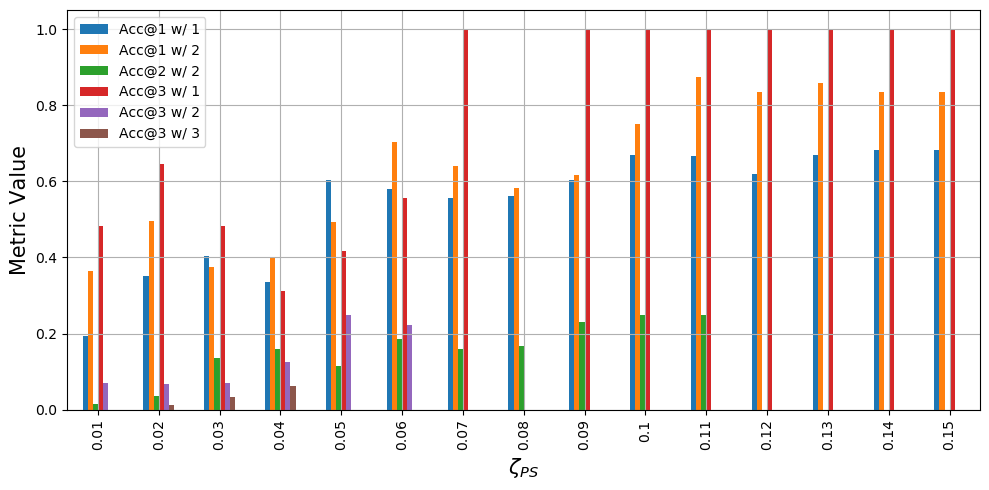

In [52]:
target_cols = '1-1 2-1 2-2 3-1 3-2 3-3'.split()
ax=top_acc_results_df.plot(kind='bar',grid=True, figsize=(10,5))
ax.set_xlabel('$\zeta_{PS}$', fontsize=15)
ax.set_ylabel('Metric Value', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join('figs','top_k_acc.png'))
plt.show()


In [34]:
date_acc_size_df = pd.read_csv(os.path.join('results','date_acc_size_evol_10d_2017_2021.csv'), index_col=0)
date_acc_size_df = date_acc_size_df.fillna(0.0)
date_acc_size_df.head()

,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,...,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17
0.01,0.428571,0.0,0.333333,0.000000,0.0,0.000000,0.000000,0.2,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
0.02,1.000000,0.0,0.000000,0.000000,0.0,0.500000,0.400000,0.0,1.0,0.0,...,0.0,0.0,0.600000,0.0,0.0,0.0,0.333333,0.0,1.0,0.666667
0.03,0.000000,0.0,0.000000,0.333333,0.5,0.666667,0.200000,0.0,1.0,0.5,...,0.0,0.0,0.333333,0.0,0.0,0.5,1.000000,0.0,0.0,0.285714
0.04,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.250000,0.0,1.0,0.0,...,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
0.05,0.000000,0.0,0.000000,1.000000,1.0,0.500000,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.500000,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000


In [35]:
date_acc_size_df = date_acc_size_df.T.reset_index()
date_acc_size_df['index'] =  pd.to_datetime(date_acc_size_df['index'],format='%Y-%m-%d')
date_acc_size_df = date_acc_size_df.set_index('index')



### Read database size

In [36]:
database_size_df= pd.read_csv(os.path.join('results','database_size_evol_10d_2017_2021.csv'), index_col=0)
database_size_df.head()

,2021-09-18,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,...,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17
0.01,72365.0,73609.0,74910.0,76553.0,77906.0,77920.0,79303.0,80682.0,80699.0,82058.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,24047.0,24065.0,24083.0,24148.0,24168.0,24177.0,24229.0,24277.0,24285.0,24310.0,...,23712.0,23717.0,23772.0,23814.0,23843.0,23877.0,23925.0,23970.0,23988.0,24024.0
0.03,11024.0,11033.0,11042.0,11063.0,11074.0,11077.0,11100.0,11119.0,11122.0,11133.0,...,10910.0,10911.0,10931.0,10939.0,10948.0,10960.0,10976.0,10989.0,10997.0,11014.0
0.04,NaN,NaN,NaN,7693.0,7694.0,7696.0,7705.0,7711.0,7713.0,7714.0,...,7644.0,NaN,7654.0,7658.0,7662.0,7668.0,7677.0,7681.0,7682.0,7687.0
0.05,NaN,NaN,NaN,5053.0,5054.0,5056.0,5059.0,NaN,5061.0,NaN,...,5039.0,NaN,5045.0,NaN,NaN,5046.0,5049.0,NaN,NaN,5052.0


In [37]:
database_size_df = database_size_df.T.reset_index()
database_size_df['index'] =  pd.to_datetime(database_size_df['index'],format='%Y-%m-%d')
database_size_df = database_size_df.set_index('index')
database_size_df= database_size_df.sort_index()

In [38]:
database_size_df.head()

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15
index,,,,,,,,,,,,,,,
2021-06-06,NaN,22229.0,9913.0,6945.0,4556.0,3406.0,2708.0,NaN,2026.0,NaN,NaN,NaN,1442.0,1318.0,1259.0
2021-06-07,NaN,22345.0,10004.0,7011.0,4599.0,3447.0,2731.0,NaN,2041.0,1683.0,1593.0,1462.0,1452.0,1328.0,1269.0
2021-06-08,NaN,22351.0,10009.0,7015.0,4601.0,3449.0,2733.0,NaN,2043.0,1685.0,1595.0,1464.0,1453.0,1329.0,1270.0
2021-06-09,NaN,22354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-10,NaN,22364.0,10048.0,7053.0,4620.0,3464.0,2801.0,2232.0,2084.0,1724.0,1635.0,1504.0,1481.0,1357.0,1298.0


In [39]:
database_size_df = database_size_df.fillna(method='ffill', axis=0)
database_size_df = database_size_df.fillna(0)

In [95]:
database_size_df.head()

,0.01,0.02,0.03,0.04,0.05,0.06,0.0699999999999999,0.08,0.09,0.0999999999999999,0.11,0.12,0.13,0.14,0.15
index,,,,,,,,,,,,,,,
2021-06-06,0.0,22229.0,9913.0,6945.0,4556.0,3406.0,2708.0,0.0,2026.0,0.0,0.0,0.0,1442.0,1318.0,1259.0
2021-06-07,0.0,22345.0,10004.0,7011.0,4599.0,3447.0,2731.0,0.0,2041.0,1683.0,1593.0,1462.0,1452.0,1328.0,1269.0
2021-06-08,0.0,22351.0,10009.0,7015.0,4601.0,3449.0,2733.0,0.0,2043.0,1685.0,1595.0,1464.0,1453.0,1329.0,1270.0
2021-06-09,0.0,22354.0,10009.0,7015.0,4601.0,3449.0,2733.0,0.0,2043.0,1685.0,1595.0,1464.0,1453.0,1329.0,1270.0
2021-06-10,0.0,22364.0,10048.0,7053.0,4620.0,3464.0,2801.0,2232.0,2084.0,1724.0,1635.0,1504.0,1481.0,1357.0,1298.0


## Plot results

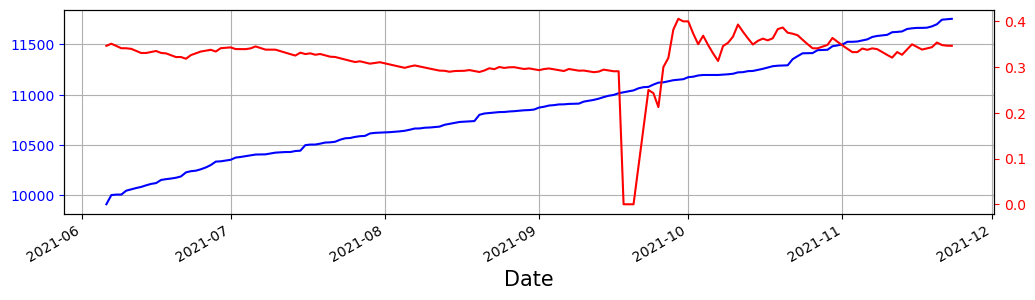

In [40]:
th= 0.03
ax=database_size_df[th].plot(grid=True, figsize=(12,3), color='blue');
ax.set_xlabel('Date', fontsize=15)
ax.tick_params(axis='y', colors='blue')

ax2= ax.twinx()
ax2.tick_params(axis='y', colors='red')
#date_acc_size_df[th].plot(ax=ax2, color='red');
date_acc_size_df[th].expanding().mean().plot(ax=ax2, color='red');
plt.show()

In [41]:
freq_ ='M'
db_size_per_month_df= database_size_df.groupby(pd.Grouper(freq=freq_)).max()
acc_per_month_df= date_acc_size_df.groupby(pd.Grouper(freq=freq_)).mean()

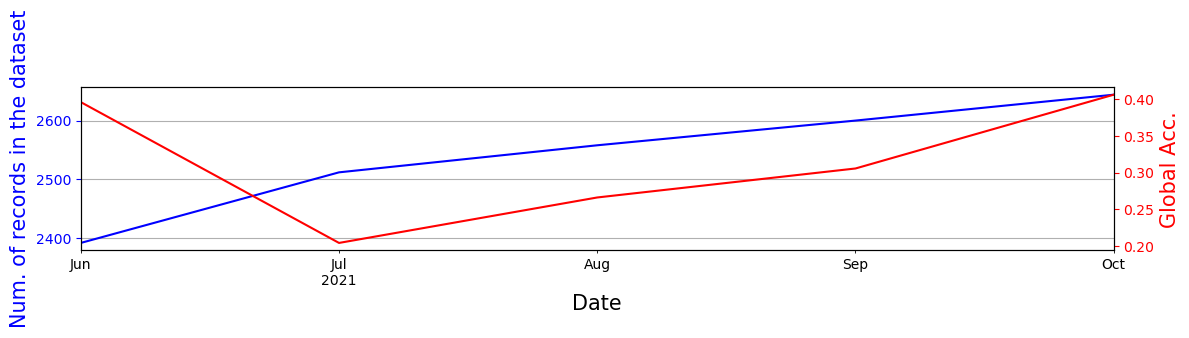

In [53]:
th=0.08
ax=db_size_per_month_df.iloc[:-1][th].plot(grid=True, figsize=(12,3), color='blue');
ax.set_xlabel('Date', fontsize=15)
ax.tick_params(axis='y', colors='blue')
ax.set_ylabel('Num. of records in the dataset', fontsize=15, color='blue')


ax2= ax.twinx()
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel('Global Acc.', fontsize=15, color='red')

acc_per_month_df.iloc[:-1][th].plot(ax=ax2, color='red');
plt.tight_layout()
plt.savefig(os.path.join('figs', 'dataset_evolution.png'))
plt.show()

### Results based on genre

In [103]:
genre_acc_df = pd.read_csv(os.path.join('results','genre_acc_10d_2017_2021.csv'), index_col=0)
genre_acc_df = genre_acc_df.fillna(0)
genre_acc_df

,latin,reggaeton,hip-hop,metal,rock,grunge,corrido,pop,emo,cumbia,...,electro,trap,j-pop,anime,indie,soul,piano,electronic,reggae,latino
0.01,0.750000,0.750000,0.750000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.500000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
0.02,0.666667,0.666667,0.250000,0.0,0.0,0.0,0.666667,0.195652,0.0,0.625000,...,0.0,0.066667,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,0.0
0.03,0.666667,0.500000,0.291667,0.0,0.2,0.0,0.000000,0.261905,0.0,0.666667,...,0.0,0.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
0.04,0.666667,0.666667,0.250000,0.0,0.0,0.0,0.000000,0.176471,0.0,0.800000,...,0.0,0.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
0.05,0.666667,0.666667,0.583333,0.0,0.0,0.0,0.000000,0.666667,0.0,0.750000,...,1.0,0.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
0.06,0.666667,0.666667,0.736842,0.0,0.0,0.0,0.000000,0.823529,0.0,1.000000,...,1.0,0.000000,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0
0.07,0.666667,0.666667,0.947368,0.0,0.0,0.0,0.000000,0.470588,0.0,1.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
0.08,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.454545,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
0.09,0.500000,0.750000,0.944444,0.0,0.0,0.0,0.000000,0.466667,0.0,1.000000,...,1.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
0.10,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.363636,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0


In [104]:
genre_acc_df.columns

Index(['latin', 'reggaeton', 'hip-hop', 'metal', 'rock', 'grunge', 'corrido',
       'pop', 'emo', 'cumbia', 'k-pop', 'rap', 'comedy', 'sertanejo', 'edm',
       'german', 'dance', 'house', 'r-n-b', 'chill', 'trance', 'funk',
       'electro', 'trap', 'j-pop', 'anime', 'indie', 'soul', 'piano',
       'electronic', 'reggae', 'latino'],
      dtype='object')

In [105]:
target_genres = ['indie', 'pop', 'rap', 'r-n-b', 'rock']

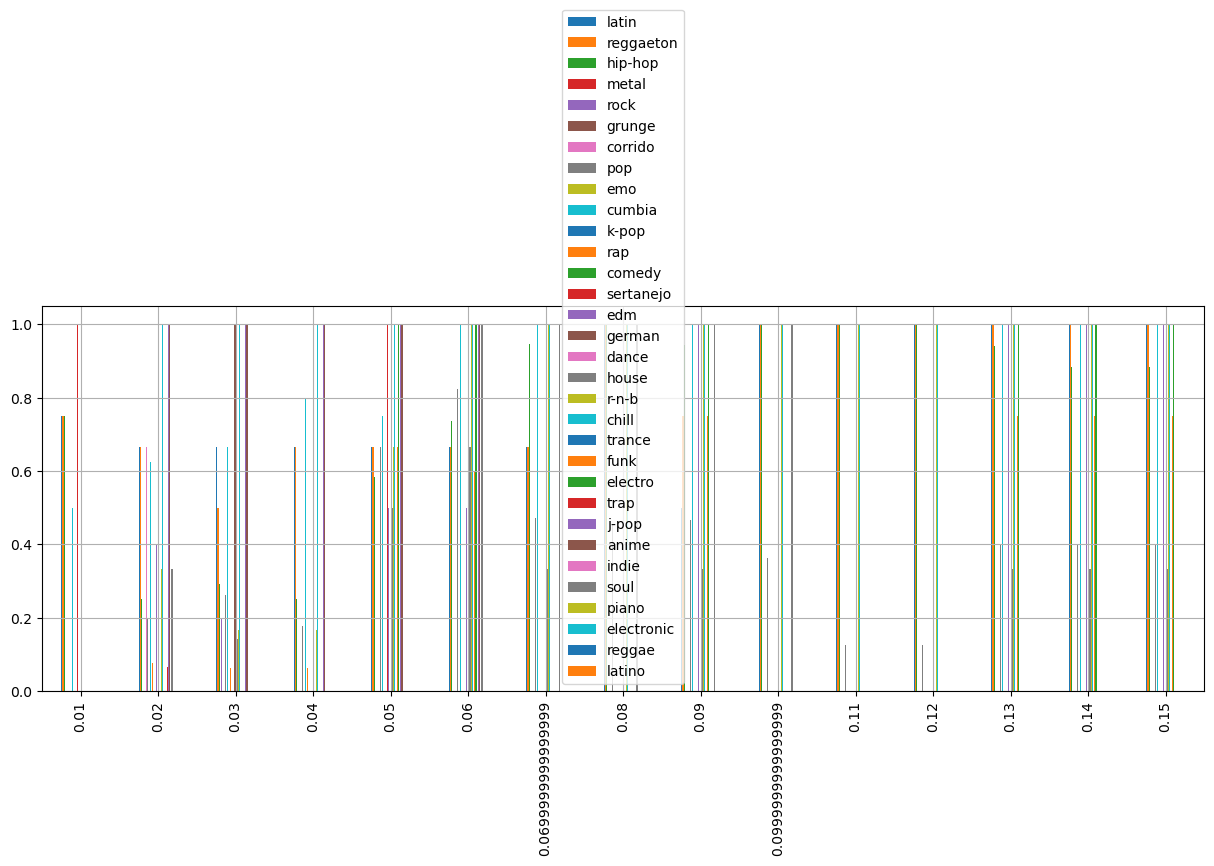

In [106]:
genre_acc_df.plot(kind='bar', grid=True, figsize=(15,5))
plt.show()

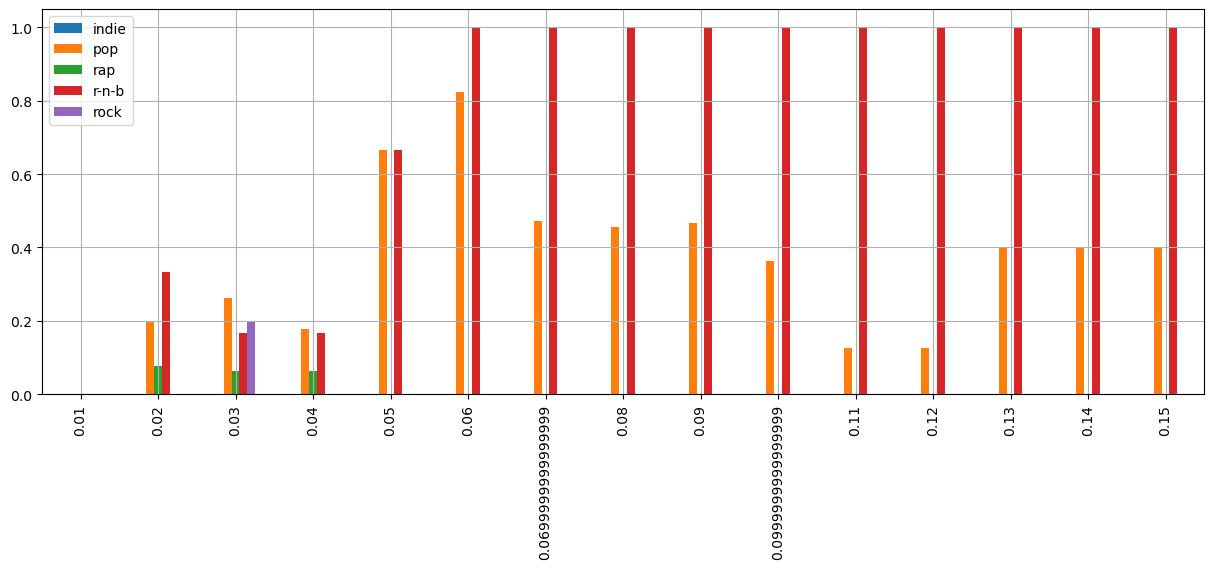

In [107]:
genre_acc_df[target_genres].plot(kind='bar', grid=True, figsize=(15,5))
plt.show()

### Results based on cluster gender

In [108]:
gender_cluster_df= pd.read_csv(os.path.join('datasets',f'gender_clusters_4.csv'), index_col=0)
#gender_cluster_df = gender_cluster_df.set_index('gender')
gender_cluster_df.head()

,gender,cluster
0,country,3
1,hip-hop,1
2,rap,3
3,edm,2
4,r-n-b,2


In [109]:
all_genders_= set(genre_acc_df.columns)

In [110]:
genre_clust_acc_df = None
for c in gender_cluster_df['cluster'].unique():
    genders_ = gender_cluster_df[gender_cluster_df['cluster']==c]['gender'].values
    target_genders = all_genders_.intersection(set(genders_))
    if genre_clust_acc_df is None:
        genre_clust_acc_df= genre_acc_df[target_genders].mean(axis=1).to_frame()
        genre_clust_acc_df.columns=[c]
    else:
        genre_clust_acc_df[c]= genre_acc_df[target_genders].mean(axis=1).to_frame()


In [111]:
genre_clust_acc_df.head()

,3,1,2,0
0.01,0.107143,0.250000,0.055556,0.375000
0.02,0.115751,0.375000,0.207407,0.431159
0.03,0.104167,0.391667,0.250529,0.380952
0.04,0.104167,0.410000,0.120370,0.421569
0.05,0.095238,0.466667,0.351852,0.666667


In [112]:
gender_cluster_df['cluster'].value_counts()

2    26
3    17
1    16
0    12
Name: cluster, dtype: int64

In [113]:
for c in gender_cluster_df['cluster'].unique():
    print(c, gender_cluster_df[gender_cluster_df['cluster']==c]['gender'].values )

3 ['country' 'rap' 'metal' 'indie' 'latin' 'metalcore' 'gospel' 'reggae'
 'dancehall' 'emo' 'punk' 'spanish' 'trap' 'cantopop' 'club' 'rockabilly'
 'soundtracks']
1 ['hip-hop' 'pop rock' 'disco' 'acoustic' 'cumbia' 'hardcore' 'electronic'
 'mpb' 'ambient' 'forro' 'j-pop' 'singer-songwriter' 'salsa' 'swedish'
 'trance' 'ranchera']
2 ['edm' 'r-n-b' 'dance' 'funk' 'blues' 'electro' 'piano' 'house' 'sad'
 'k-pop' 'folk' 'german' 'rock' 'grunge' 'alternative' 'latino' 'comedy'
 'anime' 'corrido' 'groove' 'pagode' 'soul' 'chill' 'malay' 'sertanejo'
 'ska']
0 ['pop' 'reggaeton' 'french' 'jazz' 'british' 'happy' 'dubstep' 'classical'
 'mandopop' 'techno' 'turkish' 'j-rock']


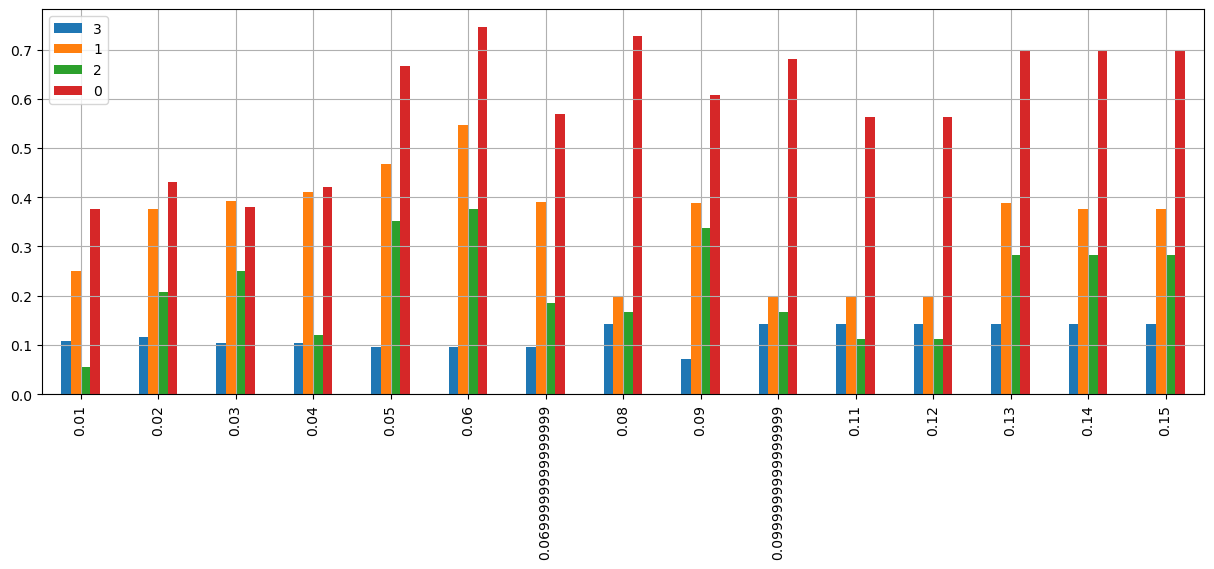

In [114]:
genre_clust_acc_df.plot(kind='bar', grid=True, figsize=(15,5))
plt.show()

In [115]:
print("That's all folks!")

That's all folks!
